In [ ]:
#ANN(Logistic)
'''
改善感知器的機率解釋性，特定向量先經過一個s函數(Logistic函數)得到機率再去經過激發函數(activation function)
步驟:
邏輯斯回歸
1.假設給定一個特徵向量[a,b,c]
2.乘上係數score = w1*a+w2*b+w3*c
3.將算出的score 經過s函數，得到新的score值，當作機率
4.讓我們的score經過一個啟動函數(Activation Function)，我們設定函數超過一定的量輸出1,否則出為0

'''


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
pd.set_option("display.max_rows", 15)
pd.set_option("display.max_columns", 10)
import warnings
warnings.filterwarnings('ignore')

#輸入資料
iris = load_iris()
df = pd.DataFrame(iris["data"],columns=iris["feature_names"])
df["target"]=iris["target"]
df = df.drop(["sepal width (cm)","petal width (cm)"], axis = 1)
from sklearn.model_selection import train_test_split
data = df.drop(["target"],axis =1)
data_train, data_test, target_train, target_test=train_test_split(data,df["target"],test_size = 0.1)

In [2]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf = clf.fit(data_train, target_train)

In [3]:
from sklearn.metrics import accuracy_score
predict = clf.predict(data_test)
print("predict:",list(predict))
print("targetlist:",list(target_test))
print("accuracy:",accuracy_score(target_test,predict)*100, '%')

predict: [1, 1, 0, 2, 1, 0, 1, 2, 0, 2, 0, 2, 1, 2, 0]
targetlist: [1, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 0]
accuracy: 93.33333333333333 %


In [4]:
#查看機率，.predict_proba返回標籤機率
proba = pd.DataFrame(clf.predict_proba(data_test))
pd.DataFrame(proba)

,0,1,2
0,0.009497,0.500740,0.489763
1,0.022264,0.597488,0.380248
2,0.804017,0.195249,0.000733
3,0.000132,0.323844,0.676024
4,0.009888,0.511388,0.478723
5,0.846534,0.153219,0.000248
6,0.038159,0.602002,0.359838
7,0.000132,0.323844,0.676024
8,0.839800,0.159893,0.000307
9,0.001604,0.376499,0.621897


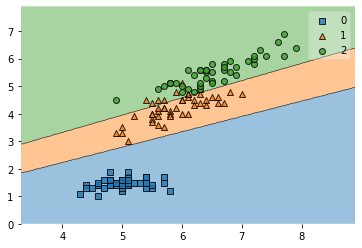

In [5]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
plot_decision_regions(X=np.array(data_train),y=np.array(target_train),clf = clf)

In [ ]:
#小結論:邏輯斯回歸可以透過加入s函式解決機率問題，但還非線性問題待解決